In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [62]:
kuusamo_url = 'https://raw.githubusercontent.com/Mini-project-Team-Theta/team_theta/refs/heads/main/final/kuusamo_df.csv'
df = pd.read_csv(kuusamo_url)
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Kuusamo Kiutak?ng?s,2004,1,1,2004-01-01,32.0,-28.6,NaN,0.2
1,Kuusamo Kiutak?ng?s,2004,1,2,2004-01-02,32.1,-20.6,NaN,-0.2
2,Kuusamo Kiutak?ng?s,2004,1,3,2004-01-03,31.0,-21.9,NaN,0.3
3,Kuusamo Kiutak?ng?s,2004,1,4,2004-01-04,30.7,-14.7,NaN,-0.4
4,Kuusamo Kiutak?ng?s,2004,1,5,2004-01-05,31.8,-14.2,NaN,-1.0


In [63]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)

In [64]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [65]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [66]:
loaded_model = joblib.load('isosyote_snow_depth_predictor.pkl')

In [67]:
predictions = loaded_model.predict(X)

In [68]:
predictions

array([87.41125926, 77.59785276, 79.01119643, ...,  1.22261108,
        4.50959092,  1.40348205], shape=(7671,))

In [69]:
y2024 = predictions[-365::10]
x2024 = X["day_of_year"][-365::10]
y2004 = predictions[:365:10]
x2004 = X["day_of_year"][:365:10]

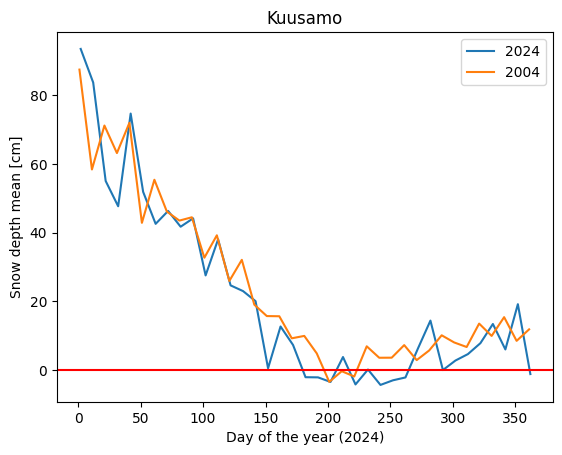

In [70]:
plt.plot(x2024, y2024, label= "2024")
plt.plot(x2004, y2004, label= "2004")
plt.title('Kuusamo')
plt.legend()
plt.axhline(y=0, color="red")
plt.ylabel('Snow depth mean [cm]')
plt.xlabel('Day of the year (2024)')
plt.show()

In [71]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
#model = LinearRegression()
#model.fit(X_train, y_train)

In [73]:
#y_pred = model.predict(X_test)

In [74]:
#mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 3))

#myline = np.linspace(1, 366, 100)

#plt.scatter(X_test["day_of_year"], y_test)
#plt.plot(myline, mymodel(myline), color='red')
#plt.xlabel("Days in a year")
#plt.ylabel("Snow depth")
#plt.title("Snow depth in Kuusamo")
#plt.show()

In [75]:
#snowdept = mymodel(2)
#print(snowdept)

In [76]:
#corr_matrix = df.corr()

In [77]:
#plt.figure(figsize=(8,6)) 
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

#plt.show()